# Random Walkers on the Tube Network

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd

import colorsys
from collections import Counter
from bokeh.plotting import figure, show
from bokeh.resources import CDN
from bokeh.io import output_notebook
output_notebook( resources=CDN )

from graph_rules import *

import networkx as nx

pd.set_option('max_colwidth', 200)

%matplotlib inline

Loading BokehJS ...

### Import Data for Network

In [17]:
loc = 'datasets'

lines       = pd.read_csv('{}/london.lines.csv'.format(loc), index_col=0)
stations    = pd.read_csv('{}/london.stations.csv'.format(loc), index_col=0)
connections = pd.read_csv('{}/london.connections.csv'.format(loc))

lines

,name,colour,stripe
line,,,
1,Bakerloo Line,AE6017,NaN
3,Circle Line,FFE02B,NaN
6,Hammersmith & City Line,F491A8,NaN
7,Jubilee Line,949699,NaN
11,Victoria Line,0A9CDA,NaN
2,Central Line,F15B2E,NaN
4,District Line,00A166,NaN
5,East London Line,FBAE34,NaN
8,Metropolitan Line,91005A,NaN


In [13]:
## Generate Adjacency Matrix

stat_no = len(stations)+1

adj_mat = np.zeros((stat_no, stat_no))

for connection_id, connection in connections.iterrows():

    adj_mat[connection['station1']-1][connection['station2']-1] = 1
    adj_mat[connection['station2']-1][connection['station1']-1] = 1

#Generate Distance Matrix

dist_mat = distance_mat(adj_mat)

In [8]:
tracked = track_ensemble(10, 100, adj_mat)

exits = [track[-1] for track in tracked]
    
{stations.loc[elem+1]['name']:exits.count(elem) for elem in range(stat_no-1) if exits.count(elem)}

{'Baker Street': 14,
 'Bond Street': 5,
 'Charing Cross': 1,
 'East Acton': 1,
 'Edgware Road (B)': 4,
 'Edgware Road (C)': 4,
 'Euston Square': 2,
 'Finchley Road': 2,
 'Goodge Street': 2,
 'Great Portland Street': 8,
 'Green Park': 2,
 'High Street Kensington': 1,
 'Hyde Park Corner': 1,
 'Kilburn': 1,
 'Kilburn Park': 1,
 'Leicester Square': 1,
 'Maida Vale': 1,
 'Marble Arch': 3,
 'Marylebone': 13,
 'Oxford Circus': 2,
 'Queensway': 1,
 "Regent's Park": 6,
 'Russell Square': 1,
 'Sloane Square': 1,
 "St. John's Wood": 11,
 'Swiss Cottage': 1,
 'Warren Street': 1,
 'Warwick Avenue': 4,
 'Wembley Park': 1,
 'West Hampstead': 4}

In [9]:
exits = [track for track in tracked if track[-1] == 103]

exits

[[10, 103],
 [10, 103],
 [10, 103],
 [10, 103],
 [10, 103],
 [10, 103],
 [10, 82, 10, 103],
 [10, 103]]

In [10]:
routes = []

for route in exits:
    routes.append([stations.loc[elem+1]['name'] for elem in route])

routes

[['Baker Street', 'Great Portland Street'],
 ['Baker Street', 'Great Portland Street'],
 ['Baker Street', 'Great Portland Street'],
 ['Baker Street', 'Great Portland Street'],
 ['Baker Street', 'Great Portland Street'],
 ['Baker Street', 'Great Portland Street'],
 ['Baker Street', 'Edgware Road (C)', 'Baker Street', 'Great Portland Street'],
 ['Baker Street', 'Great Portland Street']]

In [11]:
stat_no = len(stations)+1

adj_mat_multi = np.zeros((stat_no, stat_no))

for connection_id, connection in connections.iterrows():
#    print (connection_id)
    adj_mat_multi[connection['station1']-1][connection['station2']-1] += 1
    adj_mat_multi[connection['station2']-1][connection['station1']-1] += 1

In [12]:
sums = [sum(elem) for elem in adj_mat_multi]
stations.loc[sums.index(max(sums))+1]['name']

"King's Cross St. Pancras"

In [14]:
weighted_exits = weighted_track_ensemble(144, 10000, adj_mat_multi)

cons_needed = []

for route in weighted_exits:
    extra = list(set([tuple(np.sort([x, y])) for x, y in zip(route[:-1], route[1:])]) - set(cons_needed))
    cons_needed.extend(extra)

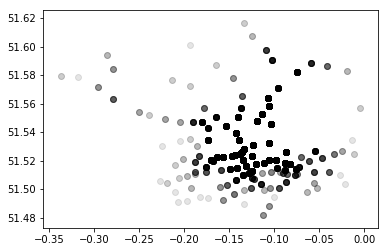

In [15]:
for route in weighted_exits:
    
    plt.scatter(stations.loc[route[-1]+1]['longitude'], stations.loc[route[-1]+1]['latitude'], color='k', zorder=10, alpha=0.1)

#plt.scatter(stations.loc[144+1]['longitude'], stations.loc[10+1]['latitude'], color='k', zorder=10)

In [16]:
routes = return_route(10, 100, adj_mat)

for route in routes:
    print (route)

[10, 93, 281, 93, 10]
[10, 82, 192, 81, 162, 81, 162, 81, 192, 81, 192, 81, 162, 10]
[10, 103, 89, 144, 38, 144, 122, 144, 38, 144, 222, 125, 59, 125, 222, 144, 38, 127, 38, 127, 9, 127, 9, 94, 159, 94, 223, 259, 25, 273, 25, 259, 25, 273, 25, 273, 25, 273, 25, 273, 25, 259, 223, 94, 122, 94, 223, 94, 122, 144, 6, 187, 166, 12, 155, 12, 224, 154, 283, 200, 283, 200, 3, 200, 26, 78, 26, 200, 283, 291, 200, 283, 154, 224, 154, 283, 200, 283, 200, 291, 200, 26, 200, 291, 41, 182, 41, 40, 22, 156, 22, 156, 28, 156, 12, 166, 13, 166, 13, 91, 144, 89, 144, 222, 144, 91, 144, 38, 144, 38, 144, 88, 276, 88, 276, 101, 276, 101, 258, 150, 258, 125, 47, 125, 59, 150, 48, 86, 284, 247, 272, 228, 235, 228, 272, 228, 272, 106, 272, 247, 284, 278, 232, 156, 12, 249, 47, 125, 258, 125, 59, 125, 258, 125, 258, 101, 258, 150, 48, 86, 284, 247, 272, 106, 191, 106, 272, 228, 235, 98, 121, 73, 137, 73, 137, 73, 121, 185, 207, 148, 207, 185, 207, 148, 207, 148, 207, 185, 17, 185, 126, 225, 295, 75, 295, 225

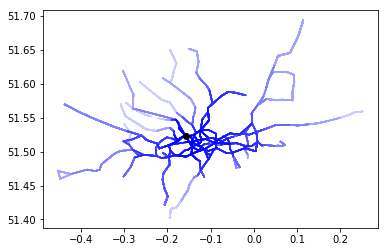

In [17]:
for route in routes:
    
    ys = [stations.loc[elem+1]['latitude'] for elem in route]
    xs = [stations.loc[elem+1]['longitude'] for elem in route]

    plt.plot(xs, ys, alpha=0.2, color='b', zorder=0)
    
#mlp.patches.Circle((stations.loc[10+1]['longitude'], stations.loc[10+1]['latitude']), radius = .5)

plt.scatter(stations.loc[10+1]['longitude'], stations.loc[10+1]['latitude'], color='k', zorder=10)

#print(stations.loc[10+1]['longitude'], stations.loc[10+1]['latitude'])

In [73]:
a = [(2, 3), (1, 3), (1, 2), (3, 3), (3, 2), (2, 1)]
b = [(2, 2), (1, 3), (1, 2), (3, 3)]

list(set(a)-set([(x,y) for y, x in a]))

[(1, 3)]

In [78]:
to_change = np.sort([3,1])

tuple(to_change)

(1, 3)

In [59]:
line1 = connections[connections['line'] == 1]
line1

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2
5,82,193,1,3
6,84,148,1,3
7,87,279,1,2
8,113,246,1,2
9,113,298,1,2


In [30]:


ys = [stations.loc[elem+1]['latitude'] for elem in route]
xs = [stations.loc[elem+1]['longitude'] for elem in route]

plt.plot(xs, ys, alpha=0.2, color='b', zorder=0)

In [61]:
max(connections['line'])

13

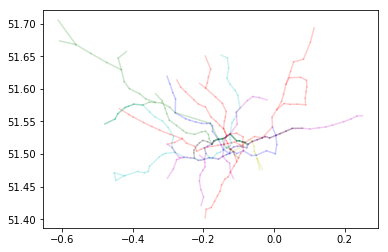

In [77]:
col = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k',]

for line_no in range(max(connections['line'])):

    line1 = connections[connections['line'] == line_no]


#     for i in range(len(line1)):

#         ys =[stations.loc[line1.iloc[i, 0]]['latitude'], stations.loc[line1.iloc[i, 1]]['latitude']]
#         xs = [stations.loc[line1.iloc[i, 0]]['longitude'], stations.loc[line1.iloc[i, 1]]['longitude']]

#         plt.plot(xs, ys, alpha=0.2, zorder=0, c=col[line_no])


In [92]:
connections[connections['line'] == 1].head()
stats = list(connections[connections['line'] == 1]['station1'])
stats.extend(list(connections[connections['line'] == 1]['station2']))

cons

TypeError: count() takes exactly one argument (0 given)

In [7]:
working_line = connections[connections['line'] == 1]

working_line.head()

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2


In [8]:
working_line = connections[connections['line'] == 1]
copy_line = connections[connections['line'] == 1]

working_line.head()

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2


In [9]:
copy_line.rename(index=str, columns={"station1": "station2", "station2": "station1"})

copy_line

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2
5,82,193,1,3
6,84,148,1,3
7,87,279,1,2
8,113,246,1,2
9,113,298,1,2


In [10]:
line_list = list(working_line['station1'])

line_list.extend(list(working_line['station2']))

line_list

line_stats = {}

line_vect = np.zeros(stat_no)

for stion in line_list:
    line_stats[stion] = line_list.count(stion)
    line_vect[stion] = 1
    

In [65]:
dists_to_line = [min([dist_mat[i, j] for i in np.nonzero(line_vect)[0]]) for j in range(stat_no)]

In [18]:
stations.iloc[11]

latitude        51.5133
longitude       -0.0886
name               Bank
display_name        NaN
zone                  1
total_lines           4
rail                  0
Name: 13, dtype: object

In [19]:
[i for i, x in enumerate(t) if x]

NameError: name 't' is not defined

In [15]:
for i in range

38.0